# Predictors of heightened cash monitoring (HCM)

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

First we read the "CS_Datasset" sheet from the excel file.

In [2]:
file_path = "Data Science Training Program Dataset2 - CollegeScorecard.xlsx"
df = pd.read_excel(file_path, sheet_name='CS_Dataset')  

In [3]:
df

,UNITID,OPEID6,INSTNM,STABBR,HCM2,PREDDEG,HIGHDEG,CONTROL,CCBASIC,HBCU,...,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,OMENRAP_ALL_POOLED_SUPP,OMAWDP8_ALL_POOLED_SUPP,FTFTPCTPELL,C150_L4_PELL_POOLED_SUPP,C150_4_PELL_POOLED_SUPP,OMENRAP_PELL_ALL_POOLED_SUPP,OMAWDP8_PELL_ALL_POOLED_SUPP,GT_THRESHOLD_P6_SUPP
0,100654,1002,Alabama A & M University,AL,0,3,4,1,18,1.0,...,NaN,0.2844,0.3893,0.3204,0.7097,NaN,0.2731,0.3953,0.2954,0.4606
1,100663,1052,University of Alabama at Birmingham,AL,0,3,4,1,15,0.0,...,NaN,0.609,0.2312,0.5519,0.3786,NaN,0.5115,0.2579,0.5151,0.659
2,100690,25034,Amridge University,AL,0,2,4,2,20,0.0,...,NaN,0.2812,0.2322,0.3184,1.0000,NaN,PrivacySuppressed,0.2523,0.2991,0.5132
3,100706,1055,University of Alabama in Huntsville,AL,0,3,4,1,16,0.0,...,NaN,0.5483,0.2968,0.5162,0.2360,NaN,0.4188,0.3218,0.4714,0.717
4,100724,1005,Alabama State University,AL,0,3,4,1,19,1.0,...,NaN,0.3142,0.4295,0.3099,0.7688,NaN,0.288,0.4261,0.2911,0.382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6184,494834,25704,Educational Technical College,PR,0,1,1,3,-2,0.0,...,0.5928,NaN,NaN,NaN,0.7204,1,NaN,NaN,NaN,NaN
6185,494843,21323,Fortis College-Landover,MD,0,1,2,3,-2,0.0,...,0.6683,NaN,0.0736,0.7056,0.8085,0.6559,NaN,0.0728,0.7063,NaN
6186,494852,4866,Stautzenberger College-Rockford Career College,IL,0,1,2,3,-2,0.0,...,0.7593,NaN,0.0113,0.3099,0.7304,0.7326,NaN,0.0041,0.3112,NaN
6187,494898,39704,WellSpring School of Allied Health-Wichita,KS,0,2,0,3,-2,0.0,...,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN


We want to predict whether an institution is on hieghtend cash moniting (HCM)

In [4]:
HCM = df['HCM2']
HCM.describe()

count    6189.000000
mean        0.009533
std         0.097179
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: HCM2, dtype: float64

In [5]:
print(HCM.unique())
print(HCM.value_counts())

[0 1]
0    6130
1      59
Name: HCM2, dtype: int64


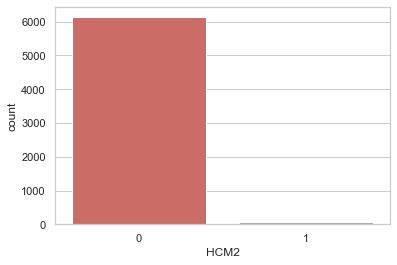

In [6]:
ax= sns.countplot(x='HCM2',data=df, palette='hls')
plt.show()

In [7]:
print(list(df.columns))

['UNITID', 'OPEID6', 'INSTNM', 'STABBR', 'HCM2', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'CCBASIC', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'ADM_RATE_ALL', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'NPT4_PUB', 'NPT4_PRIV', 'PCTPELL', 'CDR3', 'MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP', 'C150_L4_POOLED_SUPP', 'C150_4_POOLED_SUPP', 'OMENRAP_ALL_POOLED_SUPP', 'OMAWDP8_ALL_POOLED_SUPP', 'FTFTPCTPELL', 'C150_L4_PELL_POOLED_SUPP', 'C150_4_PELL_POOLED_SUPP', 'OMENRAP_PELL_ALL_POOLED_SUPP', 'OMAWDP8_PELL_ALL_POOLED_SUPP', 'GT_THRESHOLD_P6_SUPP']


In [8]:
perc = 10.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, 
                thresh=min_count)

mod_df= mod_df.select_dtypes(include=np.number)

print(mod_df)

      UNITID  OPEID6  HCM2  PREDDEG  HIGHDEG  CONTROL  CCBASIC  HBCU  PBI  \
0     100654    1002     0        3        4        1       18   1.0  0.0   
1     100663    1052     0        3        4        1       15   0.0  0.0   
2     100690   25034     0        2        4        2       20   0.0  0.0   
3     100706    1055     0        3        4        1       16   0.0  0.0   
4     100724    1005     0        3        4        1       19   1.0  0.0   
...      ...     ...   ...      ...      ...      ...      ...   ...  ...   
6184  494834   25704     0        1        1        3       -2   0.0  0.0   
6185  494843   21323     0        1        2        3       -2   0.0  0.0   
6186  494852    4866     0        1        2        3       -2   0.0  0.0   
6187  494898   39704     0        2        0        3       -2   0.0  0.0   
6188  494904   42134     0        1        1        3       -2   0.0  0.0   

      ANNHI  ...  UGDS_BLACK  UGDS_HISP  UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  

In [9]:
mod_df = mod_df.dropna()
X= mod_df.drop(columns=['HCM2'])
X

,UNITID,OPEID6,PREDDEG,HIGHDEG,CONTROL,CCBASIC,HBCU,PBI,ANNHI,TRIBAL,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PCTPELL,FTFTPCTPELL
0,100654,1002,3,4,1,18,1.0,0.0,0.0,0.0,...,0.9072,0.0091,0.0019,0.0021,0.0011,0.0114,0.0070,0.0461,0.7019,0.7097
1,100663,1052,3,4,1,15,0.0,0.0,0.0,0.0,...,0.2414,0.0565,0.0678,0.0022,0.0003,0.0446,0.0230,0.0056,0.3512,0.3786
2,100690,25034,2,4,2,20,0.0,0.0,0.0,0.0,...,0.7288,0.0164,0.0027,0.0027,0.0000,0.0411,0.0000,0.0219,0.6382,1.0000
3,100706,1055,3,4,1,16,0.0,0.0,0.0,0.0,...,0.0879,0.0566,0.0347,0.0100,0.0014,0.0361,0.0218,0.0353,0.2536,0.2360
4,100724,1005,3,4,1,19,1.0,0.0,0.0,0.0,...,0.9275,0.0099,0.0037,0.0021,0.0008,0.0120,0.0147,0.0131,0.7627,0.7688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6179,494737,42876,3,3,2,-2,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6184,494834,25704,1,1,3,-2,0.0,0.0,0.0,0.0,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7984,0.7204
6185,494843,21323,1,2,3,-2,0.0,0.0,0.0,0.0,...,0.6208,0.2560,0.0272,0.0048,0.0032,0.0160,0.0000,0.0048,0.7051,0.8085
6186,494852,4866,1,2,3,-2,0.0,0.0,0.0,0.0,...,0.1716,0.2331,0.0085,0.0000,0.0021,0.0381,0.0000,0.0000,0.7579,0.7304


In [10]:
y= mod_df['HCM2']
y

0       0
1       0
2       0
3       0
4       0
       ..
6179    0
6184    0
6185    0
6186    0
6187    0
Name: HCM2, Length: 5583, dtype: int64

In [11]:
#!pip install imblearn
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import train_test_split

oversample = SMOTE()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=oversample.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['HCM2'])

# we can Check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['HCM2']==0]))
print("Number of subscription",len(os_data_y[os_data_y['HCM2']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['HCM2']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['HCM2']==1])/len(os_data_X))

Length of oversampled data is  7744
Number of no subscription in oversampled data 3872
Number of subscription 3872
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [12]:
X= os_data_X
print(X)
y= os_data_y['HCM2']
mod_df= pd.concat([X, y], axis=1, join='inner')
print(mod_df)

      UNITID  OPEID6  PREDDEG  HIGHDEG  CONTROL  CCBASIC  HBCU  PBI  ANNHI  \
0     173416   10402        1        2        1        7   0.0  0.0    0.0   
1     460817   23068        1        2        3       10   0.0  0.0    0.0   
2     165884    2151        2        3        2       28   0.0  0.0    0.0   
3     163532    2087        3        4        2       24   0.0  0.0    0.0   
4     162335    7447        1        1        3       -2   0.0  0.0    0.0   
...      ...     ...      ...      ...      ...      ...   ...  ...    ...   
7739  492055   42621        1        1        3       -2   0.0  0.0    0.0   
7740  484113   42180        1        1        3       -2   0.0  0.0    0.0   
7741  172677   11734        1        1        3       -2   0.0  0.0    0.0   
7742  200653   11232        1        1        2        0   0.0  0.0    0.0   
7743  485665   42360        1        1        3       -2   0.0  0.0    0.0   

      TRIBAL  ...  UGDS_BLACK  UGDS_HISP  UGDS_ASIAN  UGDS_AIAN

In [13]:
import statsmodels.api as sm

logit_model_2=sm.Logit(y,X)
result_2=logit_model_2.fit()
print(result_2.summary2())

         Current function value: 0.327763
         Iterations: 35
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.527    
Dependent Variable:    HCM2              AIC:               5126.3933
Date:                  2022-06-14 00:37  BIC:               5300.2602
No. Observations:      7744              Log-Likelihood:    -2538.2  
Df Model:              24                LL-Null:           -5367.7  
Df Residuals:          7719              LLR p-value:       0.0000   
Converged:             0.0000            Scale:             1.0000   
No. Iterations:        35.0000                                       
---------------------------------------------------------------------
             Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------
UNITID        0.0000    0.0000   2.8274 0.0047      0.0000     0.0000
OPEID6        0.0000    0.0000   0.5650 0.5721     -

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
new_cols = ['PREDDEG','HIGHDEG','HBCU', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP']
new_X =mod_df[new_cols]
logit_model_2=sm.Logit(y,new_X)
result_2=logit_model_2.fit()
print(result_2.summary2())

Optimization terminated successfully.
         Current function value: 0.417224
         Iterations 11
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.398    
Dependent Variable: HCM2             AIC:              6475.9677
Date:               2022-06-14 00:37 BIC:              6524.6504
No. Observations:   7744             Log-Likelihood:   -3231.0  
Df Model:           6                LL-Null:          -5367.7  
Df Residuals:       7737             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
PREDDEG      1.2574    0.1212   10.3732  0.0000   1.0198   1.4950
HIGHDEG     -0.9759    0.0943  -10.3482  0.0000  -1.1607  -0.7911
HBCU   

In [15]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

def auc(variables, target, mod_df):
    X = mod_df[variables]
    y = mod_df[target]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return(auc)

In [16]:
auc = auc(new_cols,["HCM2"],mod_df)
print(round(auc,2))

0.88


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
new_X =X[new_cols]

logit_model_2=sm.Logit(y,new_X)
result_2=logit_model_2.fit()
print(result_2.summary2())

Optimization terminated successfully.
         Current function value: 0.417224
         Iterations 11
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.398    
Dependent Variable: HCM2             AIC:              6475.9677
Date:               2022-06-14 00:37 BIC:              6524.6504
No. Observations:   7744             Log-Likelihood:   -3231.0  
Df Model:           6                LL-Null:          -5367.7  
Df Residuals:       7737             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
PREDDEG      1.2574    0.1212   10.3732  0.0000   1.0198   1.4950
HIGHDEG     -0.9759    0.0943  -10.3482  0.0000  -1.1607  -0.7911
HBCU   

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.25, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.74      0.81       971
           1       0.78      0.92      0.84       965

    accuracy                           0.83      1936
   macro avg       0.84      0.83      0.83      1936
weighted avg       0.84      0.83      0.83      1936



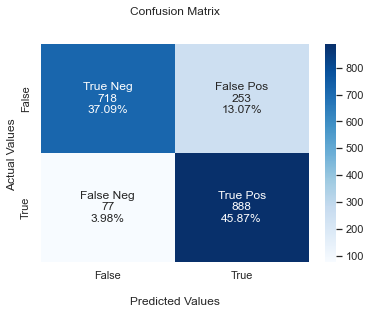

In [20]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)


group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

0.829825563091306


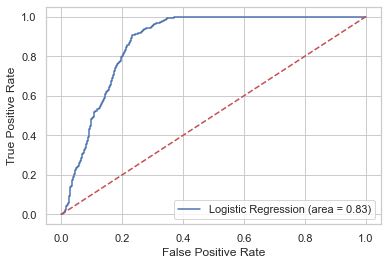

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--') # Drawing 45 degree line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_college_score card')
plt.show()